In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
# Normalize the images to a range of 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [6]:
# Load the VGG16 model, excluding the top layer (fully connected layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers for CIFAR-10 classification
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
# Freeze the layers from the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

In [9]:
# Compile the model again after unfreezing some layers for fine-tuning
for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Train with data augmentation
history_aug = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                        validation_data=(x_test, y_test), epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 67ms/step - accuracy: 0.4849 - loss: 1.4456 - val_accuracy: 0.6815 - val_loss: 0.9020
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 49ms/step - accuracy: 0.6612 - loss: 0.9730 - val_accuracy: 0.6919 - val_loss: 0.8862
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.6882 - loss: 0.8969 - val_accuracy: 0.7151 - val_loss: 0.8283
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7056 - loss: 0.8448 - val_accuracy: 0.7143 - val_loss: 0.8602
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7163 - loss: 0.8108 - val_accuracy: 0.7320 - val_loss: 0.7808
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.7252 - loss: 0.7809 - val_accuracy: 0.7332 - val_loss: 0.7692
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7370 - loss: 0.7480 - val_accuracy: 0.7476 - val_loss: 0.7446
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.7454 - loss: 0.7227 - val_accurac

In [13]:
# Using SGD with a lower learning rate for fine-tuning
sgd = SGD(learning_rate=1e-4, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Fine-tune with SGD
history_sgd = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.8129 - loss: 0.5280 - val_accuracy: 0.7650 - val_loss: 0.7052
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8270 - loss: 0.4851 - val_accuracy: 0.7672 - val_loss: 0.7012
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.8304 - loss: 0.4740 - val_accuracy: 0.7675 - val_loss: 0.6991
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8321 - loss: 0.4690 - val_accuracy: 0.7707 - val_loss: 0.6970
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8350 - loss: 0.4636 - val_accuracy: 0.7705 - val_loss: 0.6963
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8329 - loss: 0.4653 - val_accuracy: 0.7707 - val_loss: 0.6943
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8337 - loss: 0.4614 - val_accuracy: 0.7728 - val_loss: 0.6946
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.8334 - loss: 0.4629 - 

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7751 - loss: 0.6947
Test accuracy: 0.7736


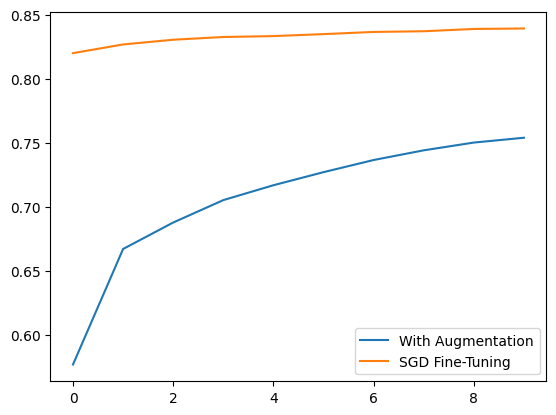

In [17]:
# If using multiple histories, plot and compare the results
import matplotlib.pyplot as plt

plt.plot(history_aug.history['accuracy'], label='With Augmentation')
plt.plot(history_sgd.history['accuracy'], label='SGD Fine-Tuning')
plt.legend()
plt.show()